<img src="P:\shared\LOGOS\U.S. Army Public Health Center\Horizontal\APHC_Horizntl_Black_web.png" alt="Army Public Health Center"/><img src="H:\One_Health\Small APHC Culture_of_Quality.jpg" alt="Army Public Health Center" width="300"/>

<center> <h1> Calculating and Comparing Product Production Time for VS One-Health Products</h1> </center>
<b>Sheldon Waugh MSc, PhD<br>
Epidemiologist<br>
One-Health Division<br> 
Veterinary Services and Public Health Sanitation Directorate<br>
US Army Public Health Center<br>

### This Python notebook is a workable and scalable example on how to make a notebook that cleans and analyzes data in a transparent way.
We have an excel workbook that details the progress of all One-Health/Veterinary Services products to include posters, brochures and newsletters. 
Taking a look at the initial structure of this spreadsheet, we have missing dates or progress for certain products. This may be due to certain products not needing certain levels of approval. It may be advantageous for us to split the data by product and then look at the time related to each product.<br>
For my sanity, I will be getting rid of the incomplete records.

# Analysis

First let's go ahead and load the .csv into python

In [1]:
import pandas as pd # import the module and alias it as pd

timedateVOH_data = pd.read_csv('C:\Users\waugh\Dropbox\Documents\One_Health\VS_Product_Analysis_dates.csv', parse_dates=True)
timedateVOH_data.head()

,Type,Draft Review,SME Content Review,PMD Content Review,VID Design Work/Edits,Submitted to CRC,CRC Review Complete
0,Brochure,NaN,NaN,5/17/2016,5/23/2016,6/1/2016,6/7/2016
1,Brochure,NaN,NaN,5/17/2016,5/23/2016,6/3/2016,6/13/2016
2,Brochure,NaN,NaN,5/17/2016,10/20/2016,11/1/2016,12/20/2016
3,Brochure,NaN,NaN,7/5/2016,7/5/2016,8/19/2016,9/2/2016
4,Brochure,5/9/2017,5/16/2017,6/6/2017,6/23/2017,8/4/2017,10/10/2017


In [2]:
timedateVOH_data.describe()

,Type,Draft Review,SME Content Review,PMD Content Review,VID Design Work/Edits,Submitted to CRC,CRC Review Complete
count,81,52,48,62,70,75,69
unique,3,36,29,31,33,33,21
top,Newsletter,6/1/2017,4/20/2016,7/11/2016,4/20/2016,8/29/2017,8/15/2016
freq,41,4,5,8,6,8,9


We see that the dates we have on the csv file did not read into python as a datetime object. Without this, we're unable to determine the elapsed time for each column.

Lets fix for the CRC columns at least so since the product wouldn't exist without CRC approval.

In [3]:
df_clean = timedateVOH_data[pd.notnull(timedateVOH_data['Submitted to CRC '])]
df_clean_1 = df_clean[pd.notnull(df_clean['CRC Review Complete'])]
df_clean_1
df_clean_2 = df_clean_1.copy()

df_clean_2['CRC Review Complete'] =  pd.to_datetime(df_clean_2['CRC Review Complete'], format = '%m/%d/%Y')
df_clean_2['Submitted to CRC '] =  pd.to_datetime(df_clean_2['Submitted to CRC '], format = '%m/%d/%Y')

df_clean_2['CRCtime'] = df_clean_2['CRC Review Complete'] - df_clean_2['Submitted to CRC ']

df_clean_2.head()


,Type,Draft Review,SME Content Review,PMD Content Review,VID Design Work/Edits,Submitted to CRC,CRC Review Complete,CRCtime
0,Brochure,NaN,NaN,5/17/2016,5/23/2016,2016-06-01,2016-06-07,6 days
1,Brochure,NaN,NaN,5/17/2016,5/23/2016,2016-06-03,2016-06-13,10 days
2,Brochure,NaN,NaN,5/17/2016,10/20/2016,2016-11-01,2016-12-20,49 days
3,Brochure,NaN,NaN,7/5/2016,7/5/2016,2016-08-19,2016-09-02,14 days
4,Brochure,5/9/2017,5/16/2017,6/6/2017,6/23/2017,2017-08-04,2017-10-10,67 days


Now that we finished the column, we now have the calculated the elapsed time!
We see, however, that certain products don't have full processing times through all columns. 
This probably means that certain products may not need certain approvals. 
So from now on, let's go ahead and split the created data.frame by the two main One-Health Products (Newsletters and Brochures).

In [4]:
#Create the dataframe subset
df_clean_2_News = df_clean_2.loc[df_clean_2['Type'] == 'Newsletter']
df_clean_2_News.head()

#Erase rows with NaN values
df_clean_3_News = df_clean_2_News[pd.notnull(df_clean_2_News['VID Design Work/Edits'])]
df_clean_4_News = df_clean_3_News[pd.notnull(df_clean_3_News['PMD Content Review'])]
df_clean_5_News = df_clean_4_News[pd.notnull(df_clean_4_News['SME Content Review'])]
df_clean_6_News = df_clean_5_News[pd.notnull(df_clean_5_News['Draft Review'])]

#Cenvert strings to datetime objects
df_clean_6_News['VID Design Work/Edits'] =  pd.to_datetime(df_clean_6_News['VID Design Work/Edits'], format = '%m/%d/%Y')
df_clean_6_News['PMD Content Review'] =  pd.to_datetime(df_clean_6_News['PMD Content Review'], format = '%m/%d/%Y')
df_clean_6_News['SME Content Review'] =  pd.to_datetime(df_clean_6_News['SME Content Review'], format = '%m/%d/%Y')
df_clean_6_News['Draft Review'] =  pd.to_datetime(df_clean_6_News['Draft Review'], format = '%m/%d/%Y')

df_clean_6_News.head()

#Create the elapsed time columns
df_clean_6_News['VID_Edittime'] = df_clean_6_News['Submitted to CRC '] - df_clean_6_News['VID Design Work/Edits']
df_clean_6_News['PMD_Reviewtime'] = df_clean_6_News['VID Design Work/Edits'] - df_clean_6_News['PMD Content Review']
df_clean_6_News['SME_Reviewtime'] = df_clean_6_News['PMD Content Review'] - df_clean_6_News['SME Content Review']
df_clean_6_News['Draft_Reviewtime'] = df_clean_6_News['SME Content Review'] - df_clean_6_News['Draft Review']

df_clean_7_News = df_clean_6_News.drop(df_clean_6_News[df_clean_6_News.PMD_Reviewtime == '-10 days'].index)
df_clean_8_News = df_clean_7_News.drop(df_clean_7_News[df_clean_7_News.PMD_Reviewtime == '-6 days'].index)
#df_clean_6_News['PMD_Reviewtime'].total_seconds()

#Good to go!
df_clean_8_News

,Type,Draft Review,SME Content Review,PMD Content Review,VID Design Work/Edits,Submitted to CRC,CRC Review Complete,CRCtime,VID_Edittime,PMD_Reviewtime,SME_Reviewtime,Draft_Reviewtime
40,Newsletter,2016-04-13,2016-04-20,2016-04-20,2016-04-20,2016-04-28,2016-05-09,11 days,8 days,0 days,0 days,7 days
41,Newsletter,2016-04-15,2016-04-20,2016-04-20,2016-04-20,2016-04-28,2016-05-09,11 days,8 days,0 days,0 days,5 days
42,Newsletter,2016-04-15,2016-04-20,2016-04-20,2016-04-20,2016-04-28,2016-05-09,11 days,8 days,0 days,0 days,5 days
43,Newsletter,2016-04-15,2016-04-20,2016-04-20,2016-04-20,2016-04-28,2016-05-09,11 days,8 days,0 days,0 days,5 days
48,Newsletter,2016-05-17,2016-05-17,2016-05-17,2016-05-17,2016-06-03,2016-06-07,4 days,17 days,0 days,0 days,0 days
54,Newsletter,2016-07-01,2016-07-05,2016-07-11,2016-07-11,2016-07-22,2016-08-15,24 days,11 days,0 days,6 days,4 days
56,Newsletter,2016-06-27,2016-06-27,2016-07-11,2016-07-11,2016-07-22,2016-08-15,24 days,11 days,0 days,14 days,0 days
58,Newsletter,2016-11-17,2016-11-23,2016-11-28,2016-11-29,2017-01-27,2017-03-30,62 days,59 days,1 days,5 days,6 days
59,Newsletter,2016-11-08,2016-11-23,2016-11-28,2016-11-29,2017-01-27,2017-03-30,62 days,59 days,1 days,5 days,15 days
61,Newsletter,2017-02-25,2017-03-15,2017-03-15,2017-03-17,2017-03-17,2017-05-08,52 days,0 days,2 days,0 days,18 days


Now lets take a look at the summary data.....

In [5]:
df_clean_8_News.describe()

,CRCtime,VID_Edittime,PMD_Reviewtime,SME_Reviewtime,Draft_Reviewtime
count,22,22,22,22,22
mean,21 days 04:21:49.090909,14 days 08:43:38.181818,60 days 02:10:54.545454,3 days 12:00:00,11 days 04:21:49.090909
std,24 days 06:22:33.479019,17 days 14:47:37.238031,143 days 17:24:49.094471,4 days 14:02:38.929146,9 days 05:32:01.438379
min,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,-1 days +00:00:00,0 days 00:00:00
25%,4 days 06:00:00,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,5 days 00:00:00
50%,11 days 00:00:00,8 days 00:00:00,2 days 00:00:00,1 days 12:00:00,8 days 00:00:00
75%,45 days 00:00:00,16 days 12:00:00,5 days 00:00:00,5 days 18:00:00,17 days 06:00:00
max,62 days 00:00:00,59 days 00:00:00,413 days 00:00:00,14 days 00:00:00,31 days 00:00:00


In [6]:
print(df_clean_8_News.CRCtime.median())
print(df_clean_8_News.VID_Edittime.median())
print(df_clean_8_News.PMD_Reviewtime.median())
print(df_clean_8_News.SME_Reviewtime.median())
print(df_clean_8_News.Draft_Reviewtime.median())

11 days 00:00:00
8 days 00:00:00
2 days 00:00:00
1 days 12:00:00
8 days 00:00:00


Yikes, we have some weird data that led to some negative elapsed times. 
We could do one of three things:
- Delete the records (rows) with the offending dates.
- Delete the PMD_Reviewtime column and analyze the other criteria.
- Leave the data unedited and ask MAJ Watkins about the dates.
Let's go ahead and do the other products.

This type of discrepancy also demonstrates the lack of an effective way of recording data. In order to effectively produce an analysis and report of any substance, our data must be reliable.<br>

A recommendation for the future is that an accurate working document <b> MUST </b> be established in order to produce reliable production time data and reports.<br>

<b>For this analysis, I've decided to delete the offending products with a negative elapsed time.</b>

In [7]:
#Create the dataframe subset
df_clean_2_1 = df_clean_2.copy()
df_clean_2_bro = df_clean_2_1.loc[df_clean_2['Type'] == 'Brochure']
df_clean_2_bro.head()
pd.options.mode.chained_assignment = None

#Erase rows with NaN values
df_clean_3_bro = df_clean_2_bro[pd.notnull(df_clean_2_bro['VID Design Work/Edits'])]
df_clean_4_bro = df_clean_3_bro[pd.notnull(df_clean_3_bro['PMD Content Review'])]
df_clean_5_bro = df_clean_4_bro[pd.notnull(df_clean_4_bro['SME Content Review'])]
df_clean_6_bro = df_clean_5_bro[pd.notnull(df_clean_5_bro['Draft Review'])]

#Cenvert strings to datetime objects
df_clean_6_bro['VID Design Work/Edits'] =  pd.to_datetime(df_clean_6_bro['VID Design Work/Edits'], format = '%m/%d/%Y')
df_clean_6_bro['PMD Content Review'] =  pd.to_datetime(df_clean_6_bro['PMD Content Review'], format = '%m/%d/%Y')
df_clean_6_bro['SME Content Review'] =  pd.to_datetime(df_clean_6_bro['SME Content Review'], format = '%m/%d/%Y')
df_clean_6_bro['Draft Review'] =  pd.to_datetime(df_clean_6_bro['Draft Review'], format = '%m/%d/%Y')

df_clean_6_News.head()

#Create the elapsed time columns
df_clean_6_bro['VID_Edittime'] = df_clean_6_bro['Submitted to CRC '] - df_clean_6_bro['VID Design Work/Edits']
df_clean_6_bro['PMD_Reviewtime'] = df_clean_6_bro['VID Design Work/Edits'] - df_clean_6_bro['PMD Content Review']
df_clean_6_bro['SME_Reviewtime'] = df_clean_6_bro['PMD Content Review'] - df_clean_6_bro['SME Content Review']
df_clean_6_bro['Draft_Reviewtime'] = df_clean_6_bro['SME Content Review'] - df_clean_6_bro['Draft Review']

#Good to go!
df_clean_6_bro

,Type,Draft Review,SME Content Review,PMD Content Review,VID Design Work/Edits,Submitted to CRC,CRC Review Complete,CRCtime,VID_Edittime,PMD_Reviewtime,SME_Reviewtime,Draft_Reviewtime
4,Brochure,2017-05-09,2017-05-16,2017-06-06,2017-06-23,2017-08-04,2017-10-10,67 days,42 days,17 days,21 days,7 days
7,Brochure,2016-11-23,2016-12-01,2016-12-02,2016-12-06,2017-01-30,2017-03-30,59 days,55 days,4 days,1 days,8 days
9,Brochure,2016-12-07,2017-02-09,2017-02-10,2017-05-17,2017-06-06,2017-06-30,24 days,20 days,96 days,1 days,64 days
10,Brochure,2016-12-09,2017-01-26,2017-01-27,2017-01-30,2017-02-02,2017-03-30,56 days,3 days,3 days,1 days,48 days
11,Brochure,2016-09-06,2016-09-09,2016-09-09,2016-09-10,2016-11-29,2017-01-02,34 days,80 days,1 days,0 days,3 days
13,Brochure,2017-03-01,2017-03-10,2017-03-13,2017-04-10,2017-06-05,2017-06-27,22 days,56 days,28 days,3 days,9 days


In [8]:
df_clean_6_bro.describe()

,CRCtime,VID_Edittime,PMD_Reviewtime,SME_Reviewtime,Draft_Reviewtime
count,6,6,6,6,6
mean,43 days 16:00:00,42 days 16:00:00,24 days 20:00:00,4 days 12:00:00,23 days 04:00:00
std,19 days 09:32:32.152061,27 days 14:37:12.911653,36 days 08:56:33.395270,8 days 03:25:10.375190,26 days 00:15:41.341229
min,22 days 00:00:00,3 days 00:00:00,1 days 00:00:00,0 days 00:00:00,3 days 00:00:00
25%,26 days 12:00:00,25 days 12:00:00,3 days 06:00:00,1 days 00:00:00,7 days 06:00:00
50%,45 days 00:00:00,48 days 12:00:00,10 days 12:00:00,1 days 00:00:00,8 days 12:00:00
75%,58 days 06:00:00,55 days 18:00:00,25 days 06:00:00,2 days 12:00:00,38 days 06:00:00
max,67 days 00:00:00,80 days 00:00:00,96 days 00:00:00,21 days 00:00:00,64 days 00:00:00


In [9]:
print(df_clean_6_bro.CRCtime.median())
print(df_clean_6_bro.VID_Edittime.median())
print(df_clean_6_bro.PMD_Reviewtime.median())
print(df_clean_6_bro.SME_Reviewtime.median())
print(df_clean_6_bro.Draft_Reviewtime.median())

45 days 00:00:00
48 days 12:00:00
10 days 12:00:00
1 days 00:00:00
8 days 12:00:00


<center> <h3>Plots and Figures</h3> </center> <br>
Now lets go ahead and produce some figures to visualize our data and demonstrate which production stage takes the most and least amount of time.<br>
First let's take a look at the brochure products...

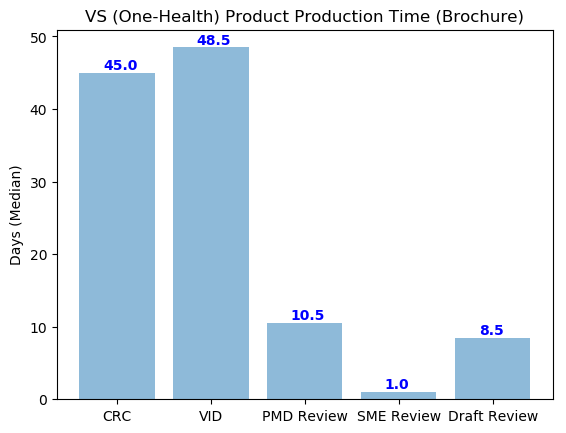

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('CRC', 'VID', 'PMD Review', 'SME Review', 'Draft Review')
y_pos = np.arange(len(objects))
performance = [df_clean_6_bro.CRCtime.dt.days.median(),df_clean_6_bro.VID_Edittime.dt.days.median(),df_clean_6_bro.PMD_Reviewtime.dt.days.median(),df_clean_6_bro.SME_Reviewtime.dt.days.median(),df_clean_6_bro.Draft_Reviewtime.dt.days.median()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Days (Median)')
plt.title('VS (One-Health) Product Production Time (Brochure)')
for i, v in enumerate(performance):
    plt.text(i-.15, v+1 , str(v), color='blue', fontweight='bold', va='center')

plt.show()

Now let's take a look at the Newsletters...

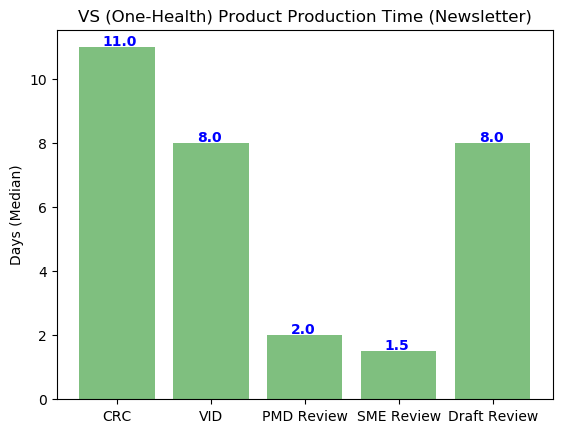

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('CRC', 'VID', 'PMD Review', 'SME Review', 'Draft Review')
y_pos = np.arange(len(objects))
performance = [df_clean_8_News.CRCtime.dt.days.median(),df_clean_8_News.VID_Edittime.dt.days.median(),df_clean_8_News.PMD_Reviewtime.dt.days.median(),df_clean_8_News.SME_Reviewtime.dt.days.median(),df_clean_8_News.Draft_Reviewtime.dt.days.median()]

plt.bar(y_pos, performance, align='center', alpha=0.5, color=['green','green','green','green','green'])
plt.xticks(y_pos, objects)
plt.ylabel('Days (Median)')
plt.title('VS (One-Health) Product Production Time (Newsletter)')
for i, v in enumerate(performance):
    plt.text(i-.15, v+.18 , str(v), color='blue', fontweight='bold', va='center')

plt.show()

# Discussion
<center> <h2>So what can we say about these graphs and analyses?</h2> </center> <br>
  With a first look, the data analysis and subsequent graphs, doesn't really tell us much about spent time due to the large discrepancies. We can see that VID processing and Review and the CRC Review process takes up the majority of time of One-Health Product development, with a wait time of 48.5 and 45 days, respectively.<br>
  <br>
  We see that comparing the brochures and newsletters, the newsletters take a shorter median amount of production time. The reasoning behind this may possibly be due to the higher frequency of newsletter production, increasing the potential efficiency of the newsletter production process.<br>
  <br>
  With a potential brochure program utilizing First Year Graduate Veterinary Education (FYGVE) students as potential authors, a strong and defined review process is necessary to eliminate potential hang up in the review process. 

#### This shows that our processing time is really dependent on the work and collaboration of other directorates regarding visual output and CRC review. 

  With the subject matter, draft and PMD review lasting roughly 75% less than VID and CRC time, recommendations should:
- Include discussions, focus groups and meetings to potentially streamline the CRC process; potentially decreasing the time at certain approval levels
- Require submitters of VS One-Health products to have a clear visual outline of what their product should look like before VID work order submission
    -  A clear and defined endstate by the customer will assist the VID designer in obtaining a product that the VID directorate and the customer will agree upon, potentially decreasing the production and processing time. Additionally, focus groups, surveys and interviews should be done within VID to discuss other potential bottlenecks during the production process.
    
    -  Additionally, with our aforementioned FYGVE brochure program, a dedicated person within the One-Health Division should be responsible for the overall setup and design of the brochures. With this, this would increase positive interaction with VID and decrease the VID production time potentially decreasing the overall production time, significantly.   

# Conclusion
In conclusion, my analysis shows that VID production and CRC approval take up more than 50 percent of the total production time in both One-health newsletters and brochures. I recommend the One-Health Division to open communication between VID and CRC to develop potential ideas to decrease processing and approval times. 